In [81]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [82]:
dataframe = pd.read_excel('D:/semestr_10/master_thesis/medical_chatbot/data/text_dataset.xlsx')

#### Remapping column names and droping unnecessary staff:

In [83]:
print(dataframe.columns.tolist())

['Płeć', 'Wiek', 'Masa ciała', 'Wzrost', 'BMI', 'Stan cywilny', 'Wykształcenie', 'Charakter pracy', 'Miejsce zamieszkania', '1. Proszę podać ilość pobytów Pana/Pani na leczeniu uzdrowiskowym. ', '2. Z jakiego powodu przebywa Pan/Pani na leczeniu uzdrowiskoym? Można zaznaczyć jedną lub więcej odpowiedzi - choroba zwyrodnieniowa barku', '2. Z jakiego powodu przebywa Pan/Pani na leczeniu uzdrowiskoym? Można zaznaczyć jedną lub więcej odpowiedzi - choroba zwyrodnieniowa rąk', '2. Z jakiego powodu przebywa Pan/Pani na leczeniu uzdrowiskoym? Można zaznaczyć jedną lub więcej odpowiedzi - choroba zwyrodnieniowa stawów biodrowych', '2. Z jakiego powodu przebywa Pan/Pani na leczeniu uzdrowiskoym? Można zaznaczyć jedną lub więcej odpowiedzi - choroba zwyrodnieniowa stawów kolanowych', '2. Z jakiego powodu przebywa Pan/Pani na leczeniu uzdrowiskoym? Można zaznaczyć jedną lub więcej odpowiedzi - choroba zwyrodnieniowa stawów stopy', '2. Z jakiego powodu przebywa Pan/Pani na leczeniu uzdrowiskoym? M

In [84]:
mapper = {
    'Płeć' : 'Gender',
    'Wiek' : 'Age',
    'Masa ciała' : 'Weight',
    'Wzrost' : 'Height',
    'Charakter pracy' : 'Work type',
    '2. Z jakiego powodu przebywa Pan/Pani na leczeniu uzdrowiskoym? Można zaznaczyć jedną lub więcej odpowiedzi - choroba zwyrodnieniowa barku' : 'Shoulder osteoarthritis',
    '2. Z jakiego powodu przebywa Pan/Pani na leczeniu uzdrowiskoym? Można zaznaczyć jedną lub więcej odpowiedzi - choroba zwyrodnieniowa rąk' : 'Hand osteoarthritis',
    '2. Z jakiego powodu przebywa Pan/Pani na leczeniu uzdrowiskoym? Można zaznaczyć jedną lub więcej odpowiedzi - choroba zwyrodnieniowa stawów biodrowych' : 'Hip joint osteoarthritis',
    '2. Z jakiego powodu przebywa Pan/Pani na leczeniu uzdrowiskoym? Można zaznaczyć jedną lub więcej odpowiedzi - choroba zwyrodnieniowa stawów kolanowych' : 'Knee osteoarthritis',
    '2. Z jakiego powodu przebywa Pan/Pani na leczeniu uzdrowiskoym? Można zaznaczyć jedną lub więcej odpowiedzi - choroba zwyrodnieniowa stawów stopy' : 'Feet osteoarthritis',
    '2. Z jakiego powodu przebywa Pan/Pani na leczeniu uzdrowiskoym? Można zaznaczyć jedną lub więcej odpowiedzi - choroba zwyrodnieniowa kręgosłupa' : 'Spine osteoarthritis',
    '3. Na podstawie jakich badań zdiagnozowano u Pana/Pani chorobę zwyrodnieniową? Można zaznaczyć jedną lub więcej odpowiedzi. - badania lekarskiego i wywiadu' : 'Diagnosis - medical examination and interview',
    '3. Na podstawie jakich badań zdiagnozowano u Pana/Pani chorobę zwyrodnieniową? Można zaznaczyć jedną lub więcej odpowiedzi. - USG (ultrasonografia)' : 'Diagnosis - USG',
    '3. Na podstawie jakich badań zdiagnozowano u Pana/Pani chorobę zwyrodnieniową? Można zaznaczyć jedną lub więcej odpowiedzi. - RTG (prześwietlenie)' : 'Diagnosis - RTG',
    '3. Na podstawie jakich badań zdiagnozowano u Pana/Pani chorobę zwyrodnieniową? Można zaznaczyć jedną lub więcej odpowiedzi. - RM (rezonans magnetyczny)' : 'Diagnosis - MRI',
    '3. Na podstawie jakich badań zdiagnozowano u Pana/Pani chorobę zwyrodnieniową? Można zaznaczyć jedną lub więcej odpowiedzi. - TK (tomografia komputerowa)' : 'Diagnosis - CT',
    '3. Na podstawie jakich badań zdiagnozowano u Pana/Pani chorobę zwyrodnieniową? Można zaznaczyć jedną lub więcej odpowiedzi. - wyniku badania płynu stawowego z zajętych stawów' : 'Diagnosis - fluid from the joint',
    '4. Według Pana/Pani co wpłynęło na rozwój choroby zwyrodnieniowej stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - wiek' : 'Cause - age',
    '4. Według Pana/Pani co wpłynęło na rozwój choroby zwyrodnieniowej stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - uwarunkowanie genetyczne' : 'Cause - genetics',
    '4. Według Pana/Pani co wpłynęło na rozwój choroby zwyrodnieniowej stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - ciężka praca fizyczna' : 'Cause - physical work',
    '4. Według Pana/Pani co wpłynęło na rozwój choroby zwyrodnieniowej stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - siedzący tryb życia' : 'Cause - sedentary lifestyle',
    '4. Według Pana/Pani co wpłynęło na rozwój choroby zwyrodnieniowej stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - mała aktywność fizyczna' : 'Cause - little physical activity',
    '4. Według Pana/Pani co wpłynęło na rozwój choroby zwyrodnieniowej stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - otyłość' : 'Cause - obesity',
    '4. Według Pana/Pani co wpłynęło na rozwój choroby zwyrodnieniowej stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - urazy' : 'Cause - injuries',
    '4. Według Pana/Pani co wpłynęło na rozwój choroby zwyrodnieniowej stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - sport wyczynowy' : 'Cause - competitive sports',
    '4. Według Pana/Pani co wpłynęło na rozwój choroby zwyrodnieniowej stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - niestabiność stawów' : 'Cause - joint instability', 
    '4. Według Pana/Pani co wpłynęło na rozwój choroby zwyrodnieniowej stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - stany zapalne stawów' : 'Cause - joint inflammation',
    '4. Według Pana/Pani co wpłynęło na rozwój choroby zwyrodnieniowej stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - koślawość kolan' : 'Cause - knock knees',
    '4. Według Pana/Pani co wpłynęło na rozwój choroby zwyrodnieniowej stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - skrzywienie kręgosłupa' : 'Cause - spinal curvature',
    '4. Według Pana/Pani co wpłynęło na rozwój choroby zwyrodnieniowej stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - choroby współistniejące' : 'Cause - comorbidities',
    '5. Jakie ma Pan/Pani dolegliwości w związku ze zwyrodnieniem stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - dolegliwości bólowe' : 'Ailments - pain',
    '5. Jakie ma Pan/Pani dolegliwości w związku ze zwyrodnieniem stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - ograniczenie ruchomości w stawie' : 'Ailments - limitation of mobility',
    '5. Jakie ma Pan/Pani dolegliwości w związku ze zwyrodnieniem stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - upośledzenie rotacji i odwodzenia w stawie' : 'Ailments - impairment of rotation and abduction in the joint', 
    '5. Jakie ma Pan/Pani dolegliwości w związku ze zwyrodnieniem stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - sztywność w stawie' : 'Ailments - stiffness in the joint', 
    '5. Jakie ma Pan/Pani dolegliwości w związku ze zwyrodnieniem stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - trudność przy schylaniu i kucaniu' : 'Ailments - difficulty bending and squatting', 
    '5. Jakie ma Pan/Pani dolegliwości w związku ze zwyrodnieniem stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - opadanie miednicy po przeciwnej stronie do zajętej zwyrodnieniem' : 'Ailments - pelvic drop on the side opposite to the affected side', 
    '5. Jakie ma Pan/Pani dolegliwości w związku ze zwyrodnieniem stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - niestabilność stawu' : 'Ailments - joint instability', 
    '5. Jakie ma Pan/Pani dolegliwości w związku ze zwyrodnieniem stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - tkliwość' : 'Ailments - tenderness', 
    '5. Jakie ma Pan/Pani dolegliwości w związku ze zwyrodnieniem stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - trzeszczenie w stawie' : 'Ailments - joint crepitus', 
    '5. Jakie ma Pan/Pani dolegliwości w związku ze zwyrodnieniem stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - poszerzenie i zniekształcenie obrysów stawów' : 'Ailments - widening and distortion of the outlines of the joints', 
    '5. Jakie ma Pan/Pani dolegliwości w związku ze zwyrodnieniem stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - obrzęk stawu' : 'Ailments - joint swelling', 
    '5. Jakie ma Pan/Pani dolegliwości w związku ze zwyrodnieniem stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - trudności w wykonywaniu palcami czynności precyzyjnych' : 'Ailments - difficulty performing precise activities with your fingers', 
    '5. Jakie ma Pan/Pani dolegliwości w związku ze zwyrodnieniem stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - utykanie' : 'Ailments - limping', 
    '5. Jakie ma Pan/Pani dolegliwości w związku ze zwyrodnieniem stawów kończyn/kręgosłupa? Można zaznaczyć jedną lub więcej odpowiedzi. - pogorszenie jakości chodu' : 'Ailments - deterioration in the quality of gait', 
    '6. Czy w rodzinie Pana/Pani występowała choroba zwyrodnieniowa stawów kończyn/ kręgosłupa?' : 'Family history with osteoarthisis',
    '7. Czy porusza się Pan/Pani samodzielnie? ' : 'Moving independently',
    '8. Czy używa Pan/Pani sprzętu pomocniczego?' : 'Use of assistive equipment',
    '9. Czy przed leczeniem uzdrowiskowym, choroba zwyrodnieniowa ograniczała Pana/Pani możliwości wykonywania czynności życia codziennego takich jak: - Wykonywanie toalety ciała, kąpieli' : 'Performing body toilet, bathing',
    '9. Czy przed leczeniem uzdrowiskowym, choroba zwyrodnieniowa ograniczała Pana/Pani możliwości wykonywania czynności życia codziennego takich jak: - Ubieranie się' : 'Dressing',
    '9. Czy przed leczeniem uzdrowiskowym, choroba zwyrodnieniowa ograniczała Pana/Pani możliwości wykonywania czynności życia codziennego takich jak: - Sprzątanie' : 'Cleaning',
    '9. Czy przed leczeniem uzdrowiskowym, choroba zwyrodnieniowa ograniczała Pana/Pani możliwości wykonywania czynności życia codziennego takich jak: - Podnoszenie lub dźwiganie ciężkich przedmiotów np. Zakupów' : 'Lifting or carrying heavy items', 
    '9. Czy przed leczeniem uzdrowiskowym, choroba zwyrodnieniowa ograniczała Pana/Pani możliwości wykonywania czynności życia codziennego takich jak: - Wchodzenie po schodach na wysokość jednego piętra' : 'Climbing stairs up to one floor',
    '9. Czy przed leczeniem uzdrowiskowym, choroba zwyrodnieniowa ograniczała Pana/Pani możliwości wykonywania czynności życia codziennego takich jak: - Wchodzenie po schodach na wysokość drugiego piętra' : 'Climbing stairs up to second floor',
    '9. Czy przed leczeniem uzdrowiskowym, choroba zwyrodnieniowa ograniczała Pana/Pani możliwości wykonywania czynności życia codziennego takich jak: - Schodzenie po schodach' : 'Going down the stairs',
    '9. Czy przed leczeniem uzdrowiskowym, choroba zwyrodnieniowa ograniczała Pana/Pani możliwości wykonywania czynności życia codziennego takich jak: - Schylanie się lub kucanie' : 'Bending or crouching',
    '9. Czy przed leczeniem uzdrowiskowym, choroba zwyrodnieniowa ograniczała Pana/Pani możliwości wykonywania czynności życia codziennego takich jak: - Spacer około 100 metrów' : 'Walk about 100 meters',
    '9. Czy przed leczeniem uzdrowiskowym, choroba zwyrodnieniowa ograniczała Pana/Pani możliwości wykonywania czynności życia codziennego takich jak: - Spacer około 500 metrów' : 'Walk about 500 meters', 
    '9. Czy przed leczeniem uzdrowiskowym, choroba zwyrodnieniowa ograniczała Pana/Pani możliwości wykonywania czynności życia codziennego takich jak: - Spacer powyżej 1 kilometra' : 'Walk above 1000 meters',
    '9. Czy przed leczeniem uzdrowiskowym, choroba zwyrodnieniowa ograniczała Pana/Pani możliwości wykonywania czynności życia codziennego takich jak: - Jazda na rowerze' : 'Cycling',
    '9. Czy przed leczeniem uzdrowiskowym, choroba zwyrodnieniowa ograniczała Pana/Pani możliwości wykonywania czynności życia codziennego takich jak: - Realizacja własnych zainteresowań' : 'Pursuing your own interests',
    '10. Jeżeli w pytaniu piątym zaznaczył Pan/Pani ból jako jedną z dolegliwości choroby zwyrodnieniowej, to jak często w ciągu ostatniego miesiąca występował? ' : 'How often did pain occur in last month',
    '11. Czy w ciągu ostatniego miesiąca ból zakłócał Pana/Pani funkcjonowanie w życiu codziennym? ' : 'Pain disturbed everyday life',
    '12. Jak często z powodu dolegliwości bólowych był Pan/Pani zmuszony zażywać leki przeciwbólowe? ' : 'Does pain forced to use of painkillers',
    '13. Czy choroba zwyrodnieniowa wpłynęła na Pana/Pani pracę zawodową? ' : 'Does osteoarthritis affected your professional work',
    '14. Czy przed chorobą uprawiał Pan/Pani jakiś sport, aktywność rekreacyjną? ' : 'Did you practice any sports or recreational activities before your illness',
    '15. Czy w związku z chorobą zwyrodnieniową był Pan/Pani zmuszony zrezygnować z: ' : 'Forced to give up',
    '16. Czy choroba zwyrodnieniowa wywołuje u Pana/Pani zaburzenia emocjonalne takie jak: ' : 'Emotional disturbances',
    '17. Czy stosował Pan/Pani do tej pory jakąś terapię w związku z chorobą zwyrodnieniową? Jeżeli tak, to jaką? Można zaznaczyć jedną lub więcej odpowiedzi. - farmakologiczną (blokady bezpośrednio do stawów)' : 'Therapy - pharmacological',
    '17. Czy stosował Pan/Pani do tej pory jakąś terapię w związku z chorobą zwyrodnieniową? Jeżeli tak, to jaką? Można zaznaczyć jedną lub więcej odpowiedzi. - niefarmakologiczną (ciepłe lub chłodne okłady, ćwiczenia)' : 'Therapy - non-pharmacological', 
    '17. Czy stosował Pan/Pani do tej pory jakąś terapię w związku z chorobą zwyrodnieniową? Jeżeli tak, to jaką? Można zaznaczyć jedną lub więcej odpowiedzi. - chirurgiczną (endoprotezoplastyka stawu biodrowego, kolanowego)' : 'Therapy - surgical', 
    '17. Czy stosował Pan/Pani do tej pory jakąś terapię w związku z chorobą zwyrodnieniową? Jeżeli tak, to jaką? Można zaznaczyć jedną lub więcej odpowiedzi. - dietę - pozwalającą utrzymać optymalną masę ciała' : 'Therapy - diet', 
    '19. Czy korzysta Pan/Pani chętnie z zabiegów i ćwiczeń oferowanych w leczeniu uzdrowiskowym?' : 'Take advantage of the treatments and exercises offered during spa treatment',
    '20. Czy w trakcie leczenia uzdrowiskowego następuje u Pana/Pani poprawa sprawności fizycznej? ' : 'Does your physical fitness improve during spa treatment?', 
    '22. Czy według Pana/Pani zastosowane metody leczenia w trakcie pobytu uzdrowiskowego pozwoliły ograniczyć zażywane leki przeciwbólowe? ' : 'Did the treatment methods used during your spa stay help you reduce the amount of painkillers you take',
    '23. Czy panujący w uzdrowisku mikroklimat wpłynął na poprawę Pana/Pani stanu zdrowia?' : 'Microclimate',
    '24. Czy kompleksowa opieka uzdrowiskowa wpłynęła na poprawę Pana/Pani samopoczucia psychicznego? (np. zmniejszając lęk i niepokój związany z chorobą) ' : 'Comprehensive spa care improved your mental well-being',
    '25. Jak ocenia Pan/Pani swój stan zdrowia obecnie, porównując go do okresu przed przyjazdem do uzdrowiska? ' : 'How do you assess your health condition now',
    '26. Czy pobyt na leczeniu uzdrowiskowym poprawił Pana/Pani jakość życia?' : 'Did your spa treatment improve your quality of life',
    '27. Jak bardzo jest Panu/Pani potrzebne leczenie uzdrowiskowe, aby dobrze funkcjonować w życiu codziennym?' : 'Do you need spa treatment in your life'  
}

In [85]:
dataframe = dataframe.rename(columns=mapper)

In [86]:
columns_to_drop = ['Stan cywilny', 'Wykształcenie', 'Miejsce zamieszkania', '1. Proszę podać ilość pobytów Pana/Pani na leczeniu uzdrowiskowym. ', 'Do you need spa treatment in your life', 'Did your spa treatment improve your quality of life', 'Comprehensive spa care improved your mental well-being', 'Microclimate', 'Did the treatment methods used during your spa stay help you reduce the amount of painkillers you take', 'Does your physical fitness improve during spa treatment?', 'Take advantage of the treatments and exercises offered during spa treatment', 'How do you assess your health condition now']

In [87]:
dataframe = dataframe.drop(columns=columns_to_drop)

First row needs to be removed since it's NAN values only.

In [88]:
dataframe.drop(dataframe.index[0:1], inplace=True)

In [89]:
dataframe = dataframe.fillna(0) 

#### Changing values of rows:

Gender

In [90]:
gender_mapper = {
    'kobieta': 'woman',
    'mężczyzna': 'man'
}
dataframe['Gender'] = dataframe['Gender'].replace(gender_mapper)

Work type

In [91]:
work_mapper = {
    'nie pracuję': 'do not work',
    'fizyczna': 'physical',
    'mieszana' : 'mixed',
    'umysłowa' : 'headwork'
}
dataframe['Work type'] = dataframe['Work type'].replace(work_mapper)

In [92]:
print(dataframe.columns.tolist())

['Gender', 'Age', 'Weight', 'Height', 'BMI', 'Work type', 'Shoulder osteoarthritis', 'Hand osteoarthritis', 'Hip joint osteoarthritis', 'Knee osteoarthritis', 'Feet osteoarthritis', 'Spine osteoarthritis', 'Diagnosis - medical examination and interview', 'Diagnosis - USG', 'Diagnosis - RTG', 'Diagnosis - MRI', 'Diagnosis - CT', 'Diagnosis - fluid from the joint', 'Cause - age', 'Cause - genetics', 'Cause - physical work', 'Cause - sedentary lifestyle', 'Cause - little physical activity', 'Cause - obesity', 'Cause - injuries', 'Cause - competitive sports', 'Cause - joint instability', 'Cause - joint inflammation', 'Cause - knock knees', 'Cause - spinal curvature', 'Cause - comorbidities', 'Ailments - pain', 'Ailments - limitation of mobility', 'Ailments - impairment of rotation and abduction in the joint', 'Ailments - stiffness in the joint', 'Ailments - difficulty bending and squatting', 'Ailments - pelvic drop on the side opposite to the affected side', 'Ailments - joint instability',

In [93]:
dataframe.head()

,Gender,Age,Weight,Height,BMI,Work type,Shoulder osteoarthritis,Hand osteoarthritis,Hip joint osteoarthritis,Knee osteoarthritis,...,Pain disturbed everyday life,Does pain forced to use of painkillers,Does osteoarthritis affected your professional work,Did you practice any sports or recreational activities before your illness,Forced to give up,Emotional disturbances,Therapy - pharmacological,Therapy - non-pharmacological,Therapy - surgical,Therapy - diet
1,woman,55.0,83.0,173.0,27.732300,physical,1.0,0.0,0.0,0.0,...,trochę,często,miałem/am trudności w wykonywaniu pracy,tak,aktywności rekreacyjnej,bezradność,0,1.0,0.0,0.0
2,woman,79.0,66.0,164.0,24.538965,headwork,1.0,1.0,0.0,0.0,...,bardzo,czasami,miałem/am trudności w wykonywaniu pracy,tak,aktywności rekreacyjnej,nerwowość,1,0.0,0.0,0.0
3,woman,74.0,105.0,164.0,39.039262,do not work,0.0,0.0,0.0,1.0,...,trochę,bardzo często,nie wpłynęła na moją pracę,nie,dłuższych spacerów niż 1 km,niepokój,0,1.0,0.0,0.0
4,woman,73.0,73.0,161.0,28.162494,headwork,0.0,1.0,0.0,1.0,...,trochę,czasami,nie wpłynęła na moją pracę,nie,nie musiałem/am rezygnować z niczego,nie występują,1,0.0,1.0,0.0
5,woman,63.0,73.0,159.0,28.875440,headwork,1.0,0.0,0.0,1.0,...,trochę,często,miałem/am trudności w wykonywaniu pracy,tak,uprawiania sportu,niepokój,0,1.0,0.0,0.0


In [94]:
metrics_list = ['Performing body toilet, bathing', 'Dressing', 'Cleaning', 'Lifting or carrying heavy items', 'Climbing stairs up to one floor', 'Climbing stairs up to second floor', 'Going down the stairs', 'Bending or crouching', 'Walk about 100 meters', 'Walk about 500 meters', 'Walk above 1000 meters', 'Cycling', 'Pursuing your own interests']

metrics_mapper = {
    'Trochę ograniczała' : 1,
    'Nie ograniczała' : 0,
    'Ograniczała' : 2,
    'Bardzo ograniczała' : 3,
    'Nie mam zdania' : 'No opinion'
}

for metric in metrics_list:
    dataframe[metric] = dataframe[metric].replace(metrics_mapper)

C:\Users\micha\AppData\Local\Temp\ipykernel_6488\4230047734.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe[metric] = dataframe[metric].replace(metrics_mapper)


In [95]:
occurence_mapper = {
    'często' : 3,
    'bardzo często' : 4,
    'rzadko' : 2,
    'bardzo rzadko' : 1,
    'nigdy' : 0
}
dataframe['How often did pain occur in last month'] = dataframe['How often did pain occur in last month'].replace(occurence_mapper)

C:\Users\micha\AppData\Local\Temp\ipykernel_6488\1645527387.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['How often did pain occur in last month'] = dataframe['How often did pain occur in last month'].replace(occurence_mapper)


In [96]:
disturb_mapper = {
    'trochę' : 1,
    'bardzo' : 3,
    'średnio' : 2,
    'wcale' : 0
}
dataframe['Pain disturbed everyday life'] = dataframe['Pain disturbed everyday life'].replace(disturb_mapper)

C:\Users\micha\AppData\Local\Temp\ipykernel_6488\498026982.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['Pain disturbed everyday life'] = dataframe['Pain disturbed everyday life'].replace(disturb_mapper)


In [97]:
force_mapper = {
    'często' : 3,
    'bardzo często' : 4,
    'rzadko' : 1,
    'czasami' : 2,
    'nie musiałem/am' : 0
}
dataframe['Does pain forced to use of painkillers'] = dataframe['Does pain forced to use of painkillers'].replace(force_mapper)

C:\Users\micha\AppData\Local\Temp\ipykernel_6488\1397881469.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['Does pain forced to use of painkillers'] = dataframe['Does pain forced to use of painkillers'].replace(force_mapper)


In [98]:
affect_work_mapper = {
    'miałem/am trudności w wykonywaniu pracy' : 'difficulties',
    'nie wpłynęła na moją pracę' : 'not affected',
    'musiałem/am zrezygnować całkowicie z pracy' : 'resign from work',
    'musiałem/am skrócić czas pracy' : 'shorten work time',
    'musiałem/am zmienić rodzaj pracy' : 'change work type'
}
dataframe['Does osteoarthritis affected your professional work'] = dataframe['Does osteoarthritis affected your professional work'].replace(affect_work_mapper)

In [99]:
sport_before_mapper = {
    'nie' : 'no',
    'tak' : 'yes',
    'nie ' : 'no'
}
dataframe['Did you practice any sports or recreational activities before your illness'] = dataframe['Did you practice any sports or recreational activities before your illness'].replace(sport_before_mapper)

In [100]:
give_up_activity_mapper = {
    'aktywności rekreacyjnej' : 'recreational activities',
    'dłuższych spacerów niż 1 km' : 'longer walks',
    'nie musiałem/am rezygnować z niczego' : 'did not resign',
    'uprawiania sportu' : 'doing sports',
    'spotkań ze znajomymi' : 'activities with friends'
}
dataframe['Forced to give up'] = dataframe['Forced to give up'].replace(give_up_activity_mapper)

In [101]:
emotional_mapper = {
    'niepokój' : 'anxiety',
    'przygnębienie' : 'depression',
    'nie występują' : 'not present',
    'bezradność' : 'helplessness',
    'nerwowość' : 'nervousness',
    'lęk' : 'anxiety',
    'płaczliwość' : 'tearfulness'
}
dataframe['Emotional disturbances'] = dataframe['Emotional disturbances'].replace(emotional_mapper)

In [102]:
dataframe.head()

,Gender,Age,Weight,Height,BMI,Work type,Shoulder osteoarthritis,Hand osteoarthritis,Hip joint osteoarthritis,Knee osteoarthritis,...,Pain disturbed everyday life,Does pain forced to use of painkillers,Does osteoarthritis affected your professional work,Did you practice any sports or recreational activities before your illness,Forced to give up,Emotional disturbances,Therapy - pharmacological,Therapy - non-pharmacological,Therapy - surgical,Therapy - diet
1,woman,55.0,83.0,173.0,27.732300,physical,1.0,0.0,0.0,0.0,...,1,3,difficulties,yes,recreational activities,helplessness,0,1.0,0.0,0.0
2,woman,79.0,66.0,164.0,24.538965,headwork,1.0,1.0,0.0,0.0,...,3,2,difficulties,yes,recreational activities,nervousness,1,0.0,0.0,0.0
3,woman,74.0,105.0,164.0,39.039262,do not work,0.0,0.0,0.0,1.0,...,1,4,not affected,no,longer walks,anxiety,0,1.0,0.0,0.0
4,woman,73.0,73.0,161.0,28.162494,headwork,0.0,1.0,0.0,1.0,...,1,2,not affected,no,did not resign,not present,1,0.0,1.0,0.0
5,woman,63.0,73.0,159.0,28.875440,headwork,1.0,0.0,0.0,1.0,...,1,3,difficulties,yes,doing sports,anxiety,0,1.0,0.0,0.0


In [103]:
def generate_healthy_patient(df):

    gender = random.choice(['woman', 'men'])
    age = random.randint(18, 80)

    if gender == 'woman':
        height = random.randint(150, 175)
    else:
        height = random.randint(160, 190)

    height_m = height / 100 
    bmi_target = random.uniform(19, 24.5)
    weight = round(bmi_target * (height_m ** 2))

    work_type = random.choice(['do not work', 'physical', 'mixed', 'headwork'])

    columns_to_change = ['Performing body toilet, bathing','Dressing', 'Cleaning', 'Lifting or carrying heavy items', 'Climbing stairs up to one floor', 'Climbing stairs up to second floor', 'Going down the stairs', 'Bending or crouching', 'Walk about 100 meters', 'Walk about 500 meters', 'Walk above 1000 meters', 'Cycling', 'Pursuing your own interests']

    difficulties_dict = {}

    for column in columns_to_change:
        difficulties_dict[column] = random.choice([0, 1, 'No opinion'])

    healthy_patient = {
        'Gender': gender,
        'Age': age,
        'Weight': weight,
        'Height': height,
        'BMI': bmi_target,
        'Work type': work_type,
        **{col: 0 for col in df.columns if 'Diagnosis' in col or 'Cause' in col or 'Ailments' in col},
        'Family history with osteoarthisis': 'no',
        'Moving independently': 'yes',
        'Use of assistive equipment': 'no',
        'Performing body toilet, bathing': difficulties_dict['Performing body toilet, bathing'],
        'Dressing': difficulties_dict['Dressing'],
        'Cleaning': difficulties_dict['Cleaning'],
        'Lifting or carrying heavy items': difficulties_dict['Lifting or carrying heavy items'],
        'Climbing stairs up to one floor': difficulties_dict['Climbing stairs up to one floor'],
        'Climbing stairs up to second floor': difficulties_dict['Climbing stairs up to second floor'],
        'Going down the stairs': difficulties_dict['Going down the stairs'],
        'Bending or crouching': difficulties_dict['Bending or crouching'],
        'Walk about 100 meters': difficulties_dict['Walk about 100 meters'],
        'Walk about 500 meters': difficulties_dict['Walk about 500 meters'],
        'Walk above 1000 meters': difficulties_dict['Walk above 1000 meters'],
        'Cycling': difficulties_dict['Cycling'],
        'Pursuing your own interests': difficulties_dict['Pursuing your own interests'],
        'How often did pain occur in last month': 0,
        'Pain disturbed everyday life': 0,
        'Does pain forced to use of painkillers': 0,
        'Does osteoarthritis affected your professional work': 0,
        'Did you practice any sports or recreational activities before your illness': 'recreational activities',
        'Forced to give up': 'not affected',
        'Emotional disturbances': 'not present',
        'Therapy - pharmacological': 0.0,
        'Therapy - non-pharmacological': 0.0,
        'Therapy - surgical': 0.0,
        'Therapy - diet': 0.0
    }

    return healthy_patient

In [104]:
for _ in range(30):
    healthy_patient = generate_healthy_patient(dataframe)
    dataframe = pd.concat([dataframe, pd.DataFrame([healthy_patient])], ignore_index=True)

In [105]:
dataframe.fillna(0, inplace=True)

In [106]:
def get_score(row):
    severity_score = 0
    ailments_columns = ['Ailments - pain', 'Ailments - limitation of mobility', 'Ailments - impairment of rotation and abduction in the joint', 'Ailments - stiffness in the joint', 'Ailments - difficulty bending and squatting', 'Ailments - pelvic drop on the side opposite to the affected side', 'Ailments - joint instability', 'Ailments - tenderness', 'Ailments - joint crepitus', 'Ailments - widening and distortion of the outlines of the joints', 'Ailments - joint swelling', 'Ailments - difficulty performing precise activities with your fingers', 'Ailments - limping', 'Ailments - deterioration in the quality of gait']
    genetic = 'Family history with osteoarthisis'
    activity_columns = ['Performing body toilet, bathing', 'Dressing', 'Cleaning', 'Lifting or carrying heavy items', 'Climbing stairs up to one floor', 'Climbing stairs up to second floor', 'Going down the stairs', 'Bending or crouching', 'Walk about 100 meters', 'Walk about 500 meters', 'Walk above 1000 meters', 'Cycling', 'Pursuing your own interests']
    pain_columns = ['How often did pain occur in last month', 'Pain disturbed everyday life']

    for ailments in ailments_columns:
        severity_score += row[ailments]

    severity_score += 1 if row[genetic] == 'yes' else 0

    for activity in activity_columns:
        activity_value = row[activity]
        if activity_value != 'No opinion':
            severity_score += activity_value

    for pain in pain_columns:
        severity_score += row[pain]

    return severity_score

In [107]:
dataframe['severity_score'] = dataframe.apply(get_score, axis=1)

In [108]:
print(dataframe['severity_score'].describe())

count    130.000000
mean      20.784615
std       12.856383
min        0.000000
25%        9.000000
50%       21.000000
75%       29.750000
max       56.000000
Name: severity_score, dtype: float64


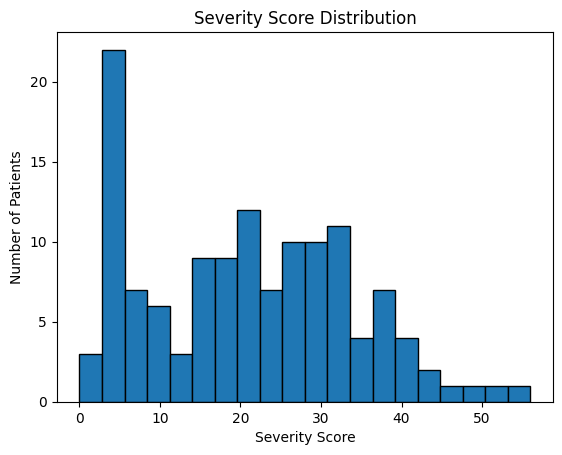

In [109]:
plt.hist(dataframe['severity_score'], bins=20, edgecolor='black')
plt.title('Severity Score Distribution')
plt.xlabel('Severity Score')
plt.ylabel('Number of Patients')
plt.show()

In [110]:
def severity_label(score):
    if score <= 8:
        return 'Grade 0 - none'
    elif score <= 18:
        return 'Grade 1 - doubtful'
    elif score <= 28:
        return 'Grade 2 - minimal'
    elif score <= 38:
        return 'Grade 3 - moderate'
    else:
        return 'Grade 4 - severe'

In [111]:
dataframe['severity_grade'] = dataframe['severity_score'].apply(severity_label)

In [112]:
dataframe['severity_grade'].value_counts()

severity_grade
Grade 2 - minimal     35
Grade 0 - none        32
Grade 1 - doubtful    27
Grade 3 - moderate    26
Grade 4 - severe      10
Name: count, dtype: int64

In [113]:
dataframe.to_csv('D:/semestr_10/master_thesis/medical_chatbot/data/text_data.csv', index=False)